# BART Project

In [2]:
# importing pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.options.mode.chained_assignment = None # bu koda gerçek veride değişiklik yapılmasını sağlar.

In [3]:
df1 = pd.read_csv("date-hour-soo-dest-2016.csv")
df2 = pd.read_csv("date-hour-soo-dest-2017.csv")

In [4]:
# date sütununu datetime olarak değiştirme
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

In [5]:
df1.info(), df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973662 entries, 0 to 9973661
Data columns (total 5 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   Hour                 int64         
 2   Origin Station       object        
 3   Destination Station  object        
 4   Trip Count           int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 380.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974095 entries, 0 to 9974094
Data columns (total 5 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   Hour                 int64         
 2   Origin Station       object        
 3   Destination Station  object        
 4   Trip Count           int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 380.5+ MB


(None, None)

In [6]:
# burda sadece 2016 yılına ait verileri tutar
df1 = df1[df1["Date"].dt.year == 2016]
df1.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count
9971577,2016-12-31,23,WOAK,PLZA,1
9971578,2016-12-31,23,WOAK,POWL,30
9971579,2016-12-31,23,WOAK,RICH,2
9971580,2016-12-31,23,WOAK,ROCK,2
9971581,2016-12-31,23,WOAK,WOAK,1


In [7]:
# burda sadece 2017 yılına ait verileri tutar
df2 = df2[df2["Date"].dt.year == 2017]
df2.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count
9972073,2017-12-31,23,WOAK,MLBR,2
9972074,2017-12-31,23,WOAK,MONT,36
9972075,2017-12-31,23,WOAK,POWL,15
9972076,2017-12-31,23,WOAK,SFIA,2
9972077,2017-12-31,23,WOAK,WOAK,1


In [8]:
# df1 ve df2 yi df de birleştirme
df = pd.concat([df1,df2])

In [9]:
df

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2
...,...,...,...,...,...
9972073,2017-12-31,23,WOAK,MLBR,2
9972074,2017-12-31,23,WOAK,MONT,36
9972075,2017-12-31,23,WOAK,POWL,15
9972076,2017-12-31,23,WOAK,SFIA,2


In [10]:
df.shape, df1.shape, df2.shape

((19943660, 5), (9971582, 5), (9972078, 5))

In [11]:
# Sütun adlarını küçük harfe çevirme
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['date', 'hour', 'origin station', 'destination station', 'trip count'], dtype='object')

In [12]:
# boşluklu olan sütunları kolay yazmak için kısaltma veya birleştirme işlemi
df = df.rename(columns={"origin station": "origin","destination station": "destination","trip count": "trip_count"})
df.head()

,date,hour,origin,destination,trip_count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


In [13]:
# day adlı sütuna gün sayısını yazma
df['day'] = (df["date"].dt.dayofyear - 1) + 1
df.head()

,date,hour,origin,destination,trip_count,day
0,2016-01-01,0,12TH,12TH,1,1
1,2016-01-01,0,12TH,16TH,1,1
2,2016-01-01,0,12TH,24TH,4,1
3,2016-01-01,0,12TH,ASHB,4,1
4,2016-01-01,0,12TH,BALB,2,1


In [14]:
# week adında bir sütun oluşturup hafta sayısını belirleme
df['week'] = ((df["date"] - df["date"].min()).dt.days/7)+1

# week verileri floattan int e çevirme
df.week = df.week.astype("int32")
df.sample(5)

,date,hour,origin,destination,trip_count,day,week
3532844,2017-05-11,22,MONT,HAYW,14,131,71
2402428,2017-03-31,18,19TH,OAKL,8,90,66
8168731,2016-10-25,19,16TH,BALB,44,299,43
615982,2016-01-24,12,PHIL,19TH,1,24,4
6721741,2016-09-02,16,DUBL,WDUB,2,246,36


In [15]:
import datetime
import calendar

In [16]:
# Tarihe göre gün adlarını df e ekleme
aziz = []
for time in df["date"]:
    aziz.append(calendar.day_name[time.weekday()])

df["day_name"] = aziz
df.sample(5)

,date,hour,origin,destination,trip_count,day,week,day_name
4910639,2016-06-28,8,MLBR,POWL,123,180,26,Tuesday
1919292,2016-03-11,10,NBRK,WCRK,2,71,11,Friday
8682614,2017-11-13,22,CONC,POWL,4,317,98,Monday
9527923,2016-12-14,21,PITT,BALB,1,349,50,Wednesday
9301230,2016-12-06,16,SFIA,NCON,5,341,49,Tuesday


In [17]:
# Rotayı belirleyip yeni bir sütuna ekleme
df["route"] = df["origin"] + "-" + df["destination"]
df.head()

,date,hour,origin,destination,trip_count,day,week,day_name,route
0,2016-01-01,0,12TH,12TH,1,1,1,Friday,12TH-12TH
1,2016-01-01,0,12TH,16TH,1,1,1,Friday,12TH-16TH
2,2016-01-01,0,12TH,24TH,4,1,1,Friday,12TH-24TH
3,2016-01-01,0,12TH,ASHB,4,1,1,Friday,12TH-ASHB
4,2016-01-01,0,12TH,BALB,2,1,1,Friday,12TH-BALB


In [18]:
df.columns

Index(['date', 'hour', 'origin', 'destination', 'trip_count', 'day', 'week',
       'day_name', 'route'],
      dtype='object')

In [19]:
df = df[['date', 'week', 'day', 'day_name', 'hour', 'origin', 'destination', 'trip_count', 'route']]

# Data Analytics Questions

### 1. Which BART station is the busiest?

In [20]:
# Yıl boyunca origin istasyonlarından en kalabalık olanı yani tur sayısı en çok olanı.
aziz = df.groupby(["origin"])["trip_count"].sum().reset_index().sort_values(by = "trip_count", ascending = False)
aziz[0:5]

,origin,trip_count
25,MONT,23784981
16,EMBR,23343712
33,POWL,20783069
8,CIVC,15010620
3,24TH,7997998


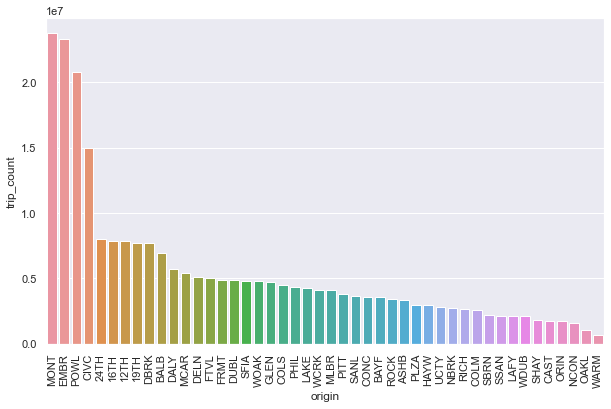

In [21]:
sns.set(rc={'figure.figsize':(10,6)})
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=aziz.origin, y=aziz.trip_count);

In [22]:
# Yıl boyunca destination istasyonlarından en kalabalık olanı yani tur sayısı en çok olanı.
aziz = df.groupby(["origin"])["trip_count"].sum().reset_index().sort_values(by = "trip_count", ascending = False)
aziz[0:5]

,origin,trip_count
25,MONT,23784981
16,EMBR,23343712
33,POWL,20783069
8,CIVC,15010620
3,24TH,7997998


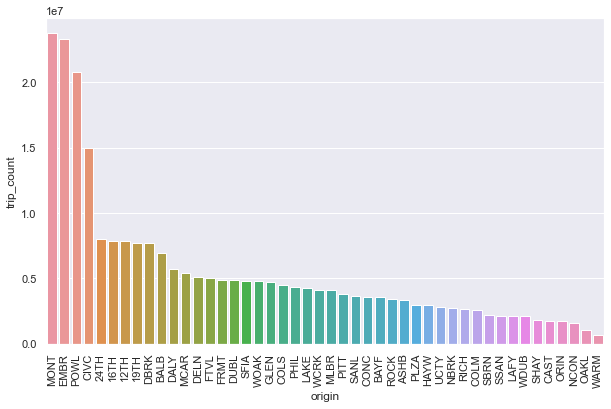

In [23]:
sns.set(rc={'figure.figsize':(10,6)})
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=aziz.origin, y=aziz.trip_count);

In [24]:
# Yıl boyunca origin ve destination istasyonlarını ayrı ayrı tur sayısını toplayarak en kalabalık istasyonu en çok olanı gösterme
aziz = (df.groupby("origin")["trip_count"].sum() + df.groupby("destination")["trip_count"].sum()).reset_index().sort_values(by = "trip_count", ascending = False)
aziz[0:5]

,origin,trip_count
16,EMBR,50539430
25,MONT,48944697
33,POWL,39164483
8,CIVC,28919516
1,16TH,15812351


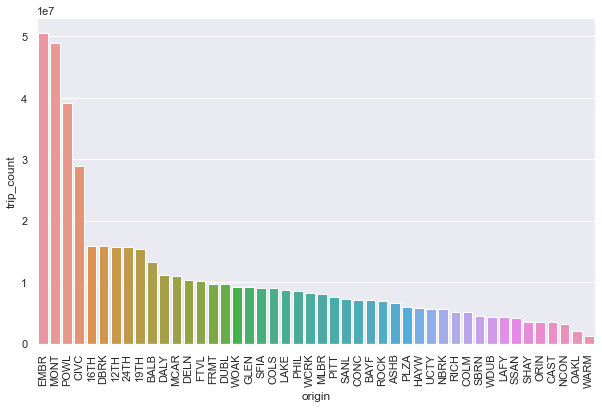

In [25]:
sns.set(rc={'figure.figsize':(10,6)})
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=aziz.origin, y=aziz.trip_count);

### 2. What is the least popular BART route?

In [26]:
# Tüm datadan, bu da bir yıla denk geliyor, rotaların tur sayısının toplamını hesaplayan ve en az tur sayısını gösteren kodu yazma
aziz = df.groupby(["route"])["trip_count"].sum().reset_index().sort_values(by = "trip_count", ascending = True)
aziz[aziz.trip_count == aziz.trip_count.min()]

,route,trip_count
1956,WARM-MLBR,268


In [27]:
aziz.shape

(2116, 2)

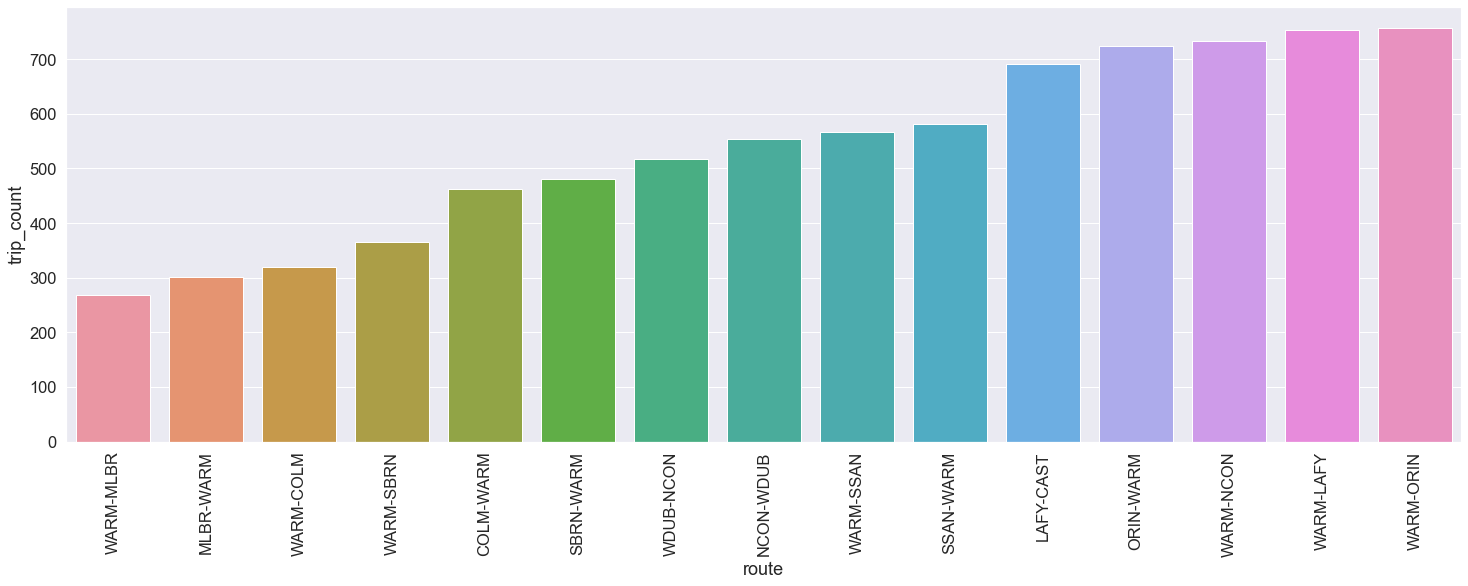

In [28]:
sns.set(rc={'figure.figsize':(25,8)})
sns.set(font_scale=1.5)
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=aziz[0:15].route, y=aziz[0:15].trip_count);

### 3. When is the best time to go to SF from Berkeley if you want to find a seat?

Bu soruda SF derken San Francisco International Airport(SFIA) dan Downtown Berkeley(DBRK) e gitmek istediğinizi anlıyorum sorunu ona göre çözmeye çalışacağım

In [29]:
aziz = df[df["route"] == "SFIA-DBRK"]

In [30]:
aziz.sample(3)

,date,week,day,day_name,hour,origin,destination,trip_count,route
2865610,2017-04-18,68,108,Tuesday,6,SFIA,DBRK,1,SFIA-DBRK
4597969,2017-06-20,77,171,Tuesday,6,SFIA,DBRK,1,SFIA-DBRK
6689400,2016-09-01,35,245,Thursday,14,SFIA,DBRK,9,SFIA-DBRK


In [31]:
azizo = aziz.groupby(["route","day_name"])["trip_count"].sum().reset_index().sort_values(by = "trip_count", ascending = True)
azizo

,route,day_name,trip_count
6,SFIA-DBRK,Wednesday,16829
2,SFIA-DBRK,Saturday,17185
4,SFIA-DBRK,Thursday,17370
5,SFIA-DBRK,Tuesday,17984
0,SFIA-DBRK,Friday,18914
1,SFIA-DBRK,Monday,22958
3,SFIA-DBRK,Sunday,23601


In [32]:
# Haftanın Çarşamba günü en az kalabalık olan gündür. Çarşamba oturarak seyehat etme şansı olabilir.
azizo[azizo.trip_count==azizo.trip_count.min()]

,route,day_name,trip_count
6,SFIA-DBRK,Wednesday,16829


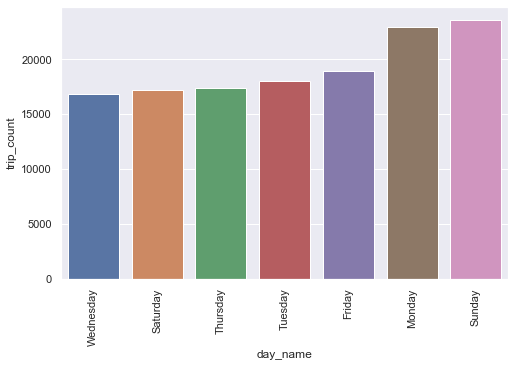

In [33]:
sns.set(rc={'figure.figsize':(8,5)})
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=azizo.day_name, y=azizo.trip_count);

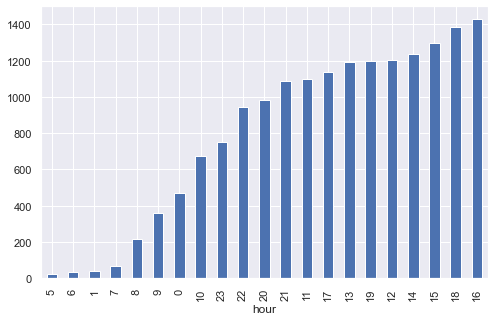

In [34]:
# Çarşamba günleri de sabah 5 saatlerinde tur sayısı çok az oluyormuş. 
# Bu çok az insanın bindiği anlamına gelir ve kişi isterse oturarak seyahat eder.
aziz[aziz.day_name == "Wednesday"].groupby(["hour"])["trip_count"].sum().sort_values(ascending = True).plot.bar();

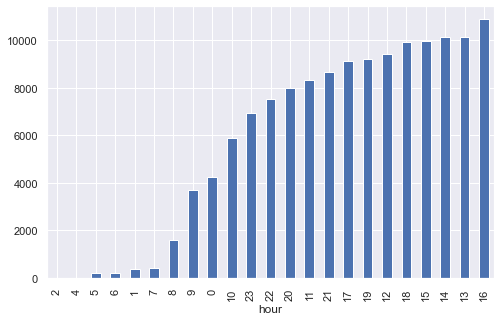

In [35]:
# Yılın geneline göre en az sefer sayısı olan saat sabahın 2' sidir.
aziz.groupby(["hour"])["trip_count"].sum().sort_values(ascending = True).plot.bar();

In [36]:
# Peki gün içinde yani sabah 8 ile akşam 9 arasında oturacak yer bulmak için en uygun saat ve günü nasıl bileceğiz?
aziz = df[(df["origin"]=="SFIA") & (df["destination"]=="DBRK")]
aziz = aziz[(aziz["hour"]>=8) & (aziz["hour"]<=21)]
azizo = aziz.groupby(["day_name"])["trip_count"].sum().reset_index().sort_values(by = "trip_count", ascending = True)
azizo[azizo.trip_count == azizo.trip_count.min()]

,day_name,trip_count
2,Saturday,14503


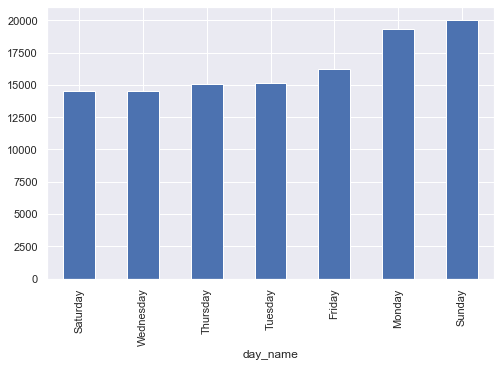

In [37]:
aziz.groupby(["day_name"])["trip_count"].sum().sort_values(ascending = True).plot.bar();
# Cumartesi günü sefer sayısı en az olan günlerdendir.Çarşamba günü sefer sayısı Cumartesi günü sefer sayısına çok yakın.

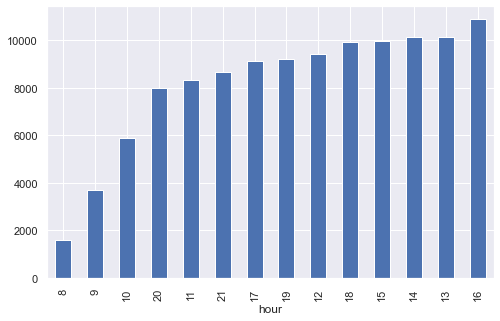

In [38]:
aziz.groupby(["hour"])["trip_count"].sum().sort_values(ascending = True).plot.bar();

### 4. Which day of the week is the busiest?

In [39]:
aziz = df.groupby(["day_name"])["trip_count"].sum().reset_index().sort_values(by = "trip_count", ascending = False)
aziz

,day_name,trip_count
6,Wednesday,45185430
4,Thursday,44821062
5,Tuesday,44458845
0,Friday,42191061
1,Monday,39825610
2,Saturday,20055208
3,Sunday,14488985


In [40]:
aziz[aziz.trip_count== aziz.trip_count.max()]
# Haftanın hangi gününün en yoğun olduğu gösterilmekte

,day_name,trip_count
6,Wednesday,45185430


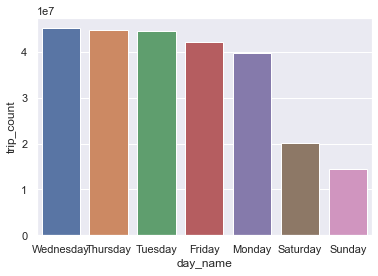

In [41]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(x = aziz.day_name, y=aziz.trip_count);

### 5. How many people take the BART late at night?

(Late at night: Midnight-6 a.m.)

Kaç insanın old. ile ilgili veri yok elimde. Ama saat 6 daki toplam tur sayısı bulunabilir.

In [42]:
# Saat 6(late at night)' da toplam tur sayısı: 
df[df["hour"]==6]["trip_count"].sum()

7574290

In [43]:
# Haftanın günlerine göre saat 6 da toplam tur sayısı
aziz= df[df["hour"]==6].groupby("day_name")["trip_count"].sum().reset_index().sort_values(by = "trip_count", ascending = False)
aziz

,day_name,trip_count
6,Wednesday,1577536
5,Tuesday,1564492
4,Thursday,1528386
0,Friday,1352963
1,Monday,1344586
2,Saturday,203188
3,Sunday,3139


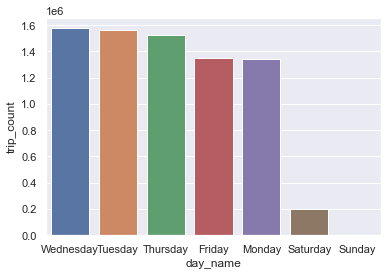

In [44]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(x=aziz.day_name, y=aziz.trip_count);

# Data Science Questions

In [45]:
df_station = pd.read_csv("station_info.csv")

In [46]:
df_station.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


### Question A: Compute the straight line distance between every station

In [47]:
# Location içinde virgülle belirtilen enlem ve boylam verileri ayrı bir sütunda gösterme
df_station['boylam'] = df_station.Location.apply(lambda x: float(x.split(',')[0]))
df_station['enlem'] = df_station.Location.apply(lambda x: float(x.split(',')[1]))
df_station.head()

,Abbreviation,Description,Location,Name,boylam,enlem
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH),-122.271450,37.803768
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH),-122.419694,37.765062
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH),-122.268602,37.808350
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH),-122.418143,37.752470
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB),-122.270062,37.852803


In [48]:
# Sütun adlarını küçük harfe çevirme
df_station.columns = [x.lower() for x in df_station.columns]
df_station.columns

Index(['abbreviation', 'description', 'location', 'name', 'boylam', 'enlem'], dtype='object')

In [49]:
# boşluklu olan sütunları kolay yazmak için kısaltma veya birleştirme işlemi
df_station = df_station.rename(columns={"abbreviation": "abbr","description": "desc","location": "loc"})
df_station.head()

,abbr,desc,loc,name,boylam,enlem
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH),-122.271450,37.803768
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH),-122.419694,37.765062
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH),-122.268602,37.808350
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH),-122.418143,37.752470
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB),-122.270062,37.852803


In [50]:
df_station.shape

(46, 6)

In [51]:
dfstat = df_station[["name", "abbr","enlem","boylam"]]

In [52]:
# İstasyonların enlem ve boylamlarını çeken fonksiyonlar
def x1_boylam(origin):
    aziz = list(dfstat[dfstat.abbr == origin]["boylam"])[0]
    return aziz
def y1_enlem(origin):
    aziz = list(dfstat[dfstat.abbr == origin]["enlem"])[0]
    return aziz
def x2_boylam(destination):
    aziz = list(dfstat[dfstat.abbr == destination]["boylam"])[0]
    return aziz
def y2_enlem(destination):
    aziz = list(dfstat[dfstat.abbr == destination]["enlem"])[0]
    return aziz

In [53]:
i=100

In [54]:
# i=len(df) yapılırsa her istasyon için kuşbakışı doğrusal hat mesafesi hesaplanabilir.
# Veri uzun olduğundan şimdilik i=100 olarak atanmıştır.
df["x1"] = df["origin"][0:i].apply(x1_boylam)
df["y1"] = df["origin"][0:i].apply(y1_enlem)
df["y1"] = df["origin"][0:i].apply(y1_enlem)
df["x2"] = df["destination"][0:i].apply(x2_boylam)
df["y2"] = df["destination"][0:i].apply(y2_enlem)
df["straight_dist"] = ((df["x1"]-df["y1"])**2 + (df["x2"]-df["y2"])**2)**(1/2)
df.drop(["x1","x2","y1","y2"], axis=1, inplace=True)

In [55]:
df.head(5)

,date,week,day,day_name,hour,origin,destination,trip_count,route,straight_dist
0,2016-01-01,1,1,Friday,0,12TH,12TH,1,12TH-12TH,226.380544
1,2016-01-01,1,1,Friday,0,12TH,16TH,1,12TH-16TH,226.458013
2,2016-01-01,1,1,Friday,0,12TH,24TH,4,12TH-24TH,226.448009
3,2016-01-01,1,1,Friday,0,12TH,ASHB,4,12TH-ASHB,226.414238
4,2016-01-01,1,1,Friday,0,12TH,BALB,2,12TH-BALB,226.446932


### Question B: Build a model that can predict the number of people commuting to work by Bart between any 2 stations:

In [56]:
df.head(2)

,date,week,day,day_name,hour,origin,destination,trip_count,route,straight_dist
0,2016-01-01,1,1,Friday,0,12TH,12TH,1,12TH-12TH,226.380544
1,2016-01-01,1,1,Friday,0,12TH,16TH,1,12TH-16TH,226.458013


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19943660 entries, 0 to 9972077
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   week           int32         
 2   day            int64         
 3   day_name       object        
 4   hour           int64         
 5   origin         object        
 6   destination    object        
 7   trip_count     int64         
 8   route          object        
 9   straight_dist  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(4)
memory usage: 1.6+ GB


In [58]:
df.shape

(19943660, 10)

In [59]:
# Veri çok uzun olduğundan biraz kısaltalım ortalamayla
data = df.groupby(["day_name","hour","route"])["trip_count"].mean().reset_index()
data.head()

,day_name,hour,route,trip_count
0,Friday,0,12TH-12TH,1.422222
1,Friday,0,12TH-16TH,3.325843
2,Friday,0,12TH-19TH,1.219512
3,Friday,0,12TH-24TH,4.809524
4,Friday,0,12TH-ASHB,2.619048


In [60]:
data.shape

(307219, 4)

In [61]:
# Makine öğrenmesi için x ve y belirleme
x = data[["hour", "route"]]
y = data["trip_count"]

In [62]:
# Object verileri rakamsal veri olarak gruplama
x = pd.get_dummies(x, drop_first=True)

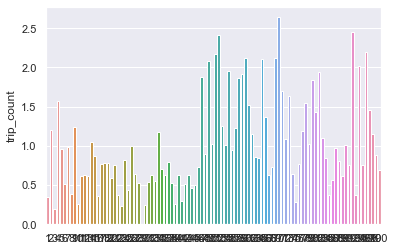

In [63]:
sns.barplot(x=np.arange(1,(len(data[0:100])+1)),y=np.log(data[0:100].trip_count));

In [64]:
data.trip_count.describe()

count    307219.000000
mean          8.594815
std          25.706085
min           1.000000
25%           1.347826
50%           2.116883
75%           5.625000
max         775.711538
Name: trip_count, dtype: float64

#### Gerekli Kütüphaneleri import edilmesi

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

##### Linear Regression ile Model Tahmini

In [66]:
L = LinearRegression()

In [67]:
# x ve y yi öğrenme ve test için ayırıyoruz
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

In [68]:
# Burda modeli eğitiyoruz
L.fit(x_train, y_train)

LinearRegression()

In [69]:
# Modelimiz ile test için ayırdığımız veriyi test ediyoruz
tahmin = L.predict(x_test)

In [70]:
# Modelimizin R2_score, mean squared error ve mean absolute error una bakıyoruz
print(*["R2_Score : ", r2_score(y_test, tahmin)])
print(*["Mean Squared Error : ", (mean_squared_error(y_test, tahmin)**.5)])
print(*["Mean Absolute Error : ", mean_absolute_error(y_test, tahmin)])

R2_Score :  0.2456327767734654
Mean Squared Error :  23.48957110483693
Mean Absolute Error :  7.301827249320379


In [71]:
mean_squared_error(y_test, tahmin)**.5

23.48957110483693

In [72]:
mean_absolute_error(y_test, tahmin)

7.301827249320379

##### XGradient Boost Regression ile Model Tahmini

In [73]:
XGBR = XGBRegressor()

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

In [75]:
# Burda modeli eğitiyoruz
XGBR.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [76]:
# Modelimiz ile test için ayırdığımız veriyi test ediyoruz
tahmin = XGBR.predict(x_test)

In [77]:
# Modelimizin R2_score, mean squared error ve mean absolute error una bakıyoruz
print(*["R2_Score : ", r2_score(y_test, tahmin)])
print(*["Mean Squared Error : ", (mean_squared_error(y_test, tahmin)**.5)])
print(*["Mean Absolute Error : ", mean_absolute_error(y_test, tahmin)])

R2_Score :  0.477146063586981
Mean Squared Error :  19.555722817131876
Mean Absolute Error :  7.2279560127662705


### How would you want the city or Bart officials to use your data?

Tabi ki  düzenlemiş olduğum veriyi aşağıdaki kod yardımıyla kaydedip onlarla paylaşırız.

In [79]:
df.to_csv("2016-2017-bart-data.csv", index = False)